In [1]:
import sys
import time
import cv2
import matplotlib.pyplot as plt

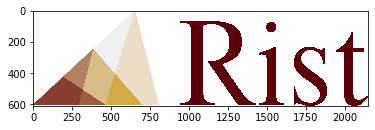

<Figure size 432x288 with 0 Axes>

In [2]:
### VALUES
NUM_REPEAT = 10000

### Read source image
img_src = cv2.imread("data/Rist.png")
plt.imshow(img_src)
plt.show()
plt.clf()

CPU = 0.506326961517334[msec]


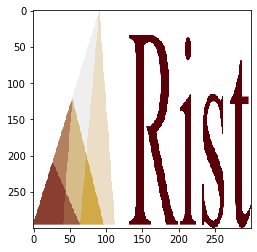

GPU = 0.4563901901245117[msec]


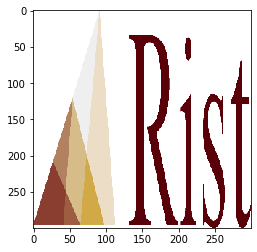

1


<Figure size 432x288 with 0 Axes>

In [3]:
### Run with CPU
time_start = time.time()
for i in range (NUM_REPEAT):
    img_dst = cv2.resize(img_src, (300, 300))
time_end = time.time()
print ("CPU = {0}".format((time_end - time_start) * 1000 / NUM_REPEAT) + "[msec]")
plt.imshow(img_dst)
plt.show()
plt.clf()


### Run with GPU
img_gpu_src = cv2.cuda_GpuMat() # Allocate device memory only once, as memory allocation seems to take time...
img_gpu_dst = cv2.cuda_GpuMat()
time_start = time.time()
for i in range (NUM_REPEAT):
    img_gpu_src.upload(img_src)
    img_gpu_dst = cv2.cuda.resize(img_gpu_src, (300, 300))
    img_dst = img_gpu_dst.download()
time_end = time.time()
print ("GPU = {0}".format((time_end - time_start) * 1000 / NUM_REPEAT) + "[msec]")
plt.imshow(img_dst)
plt.show()
plt.clf()

print(cv2.cuda.getCudaEnabledDeviceCount())

In [4]:
help(cv2.cuda)

Help on module cv2.cuda in cv2:

NAME
    cv2.cuda

FUNCTIONS
    BroxOpticalFlow_create(...)
        BroxOpticalFlow_create([, alpha[, gamma[, scale_factor[, inner_iterations[, outer_iterations[, solver_iterations]]]]]]) -> retval
        .
    
    CascadeClassifier_create(...)
        CascadeClassifier_create(filename) -> retval
        .   @brief Loads the classifier from a file. Cascade type is detected automatically by constructor parameter.
        .   
        .       @param filename Name of the file from which the classifier is loaded. Only the old haar classifier
        .       (trained by the haar training application) and NVIDIA's nvbin are supported for HAAR and only new
        .       type of OpenCV XML cascade supported for LBP. The working haar models can be found at opencv_folder/data/haarcascades_cuda/
    
    DensePyrLKOpticalFlow_create(...)
        DensePyrLKOpticalFlow_create([, winSize[, maxLevel[, iters[, useInitialFlow]]]]) -> retval
        .
    
    Descr

In [3]:
help(cv2.cuda.Stream_Null)

Help on built-in function Stream_Null:

Stream_Null(...)
    Stream_Null() -> retval
    .   @brief Adds a callback to be called on the host after all currently enqueued items in the stream have
    .       completed.
    .   
    .       @note Callbacks must not make any CUDA API calls. Callbacks must not perform any synchronization
    .       that may depend on outstanding device work or other callbacks that are not mandated to run earlier.
    .       Callbacks without a mandated order (in independent streams) execute in undefined order and may be
    .       serialized.

